In [115]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [116]:
#reading in the housing price data
data = pd.read_csv("housing.csv")

In [117]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [119]:
#dropping any null values
data.dropna(inplace=True)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [121]:
#Splitting dataset into features input(variables) and target variables
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1)
Y = data['median_house_value']

In [122]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [123]:
#splitting dataset into 20% used for testing, and the remaining 80% will be used for training.
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [124]:
#combining the feature matrix (X_train) and the target variable (Y_train) into a single DataFrame (train_data).
train_data = X_train.join(Y_train)

In [125]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7537,-118.21,33.91,24.0,1545.0,391.0,1807.0,388.0,2.6429,<1H OCEAN,105300.0
18273,-122.08,37.36,28.0,2181.0,284.0,728.0,238.0,8.2266,NEAR BAY,500001.0
17753,-121.82,37.35,24.0,2298.0,575.0,2409.0,569.0,3.4509,<1H OCEAN,182400.0
16669,-120.70,35.32,46.0,118.0,17.0,6532.0,13.0,4.2639,NEAR OCEAN,350000.0
18254,-122.09,37.39,36.0,1035.0,196.0,475.0,205.0,5.5385,NEAR BAY,359000.0
...,...,...,...,...,...,...,...,...,...,...
12097,-117.28,33.89,33.0,6982.0,1371.0,5650.0,1195.0,2.5379,INLAND,152700.0
16343,-121.33,38.04,15.0,2903.0,440.0,1325.0,423.0,4.5179,INLAND,145600.0
20450,-118.91,34.28,6.0,6106.0,1134.0,3246.0,1062.0,5.2206,<1H OCEAN,280200.0
5032,-118.33,33.98,28.0,3889.0,1199.0,3121.0,1046.0,1.8806,<1H OCEAN,113900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

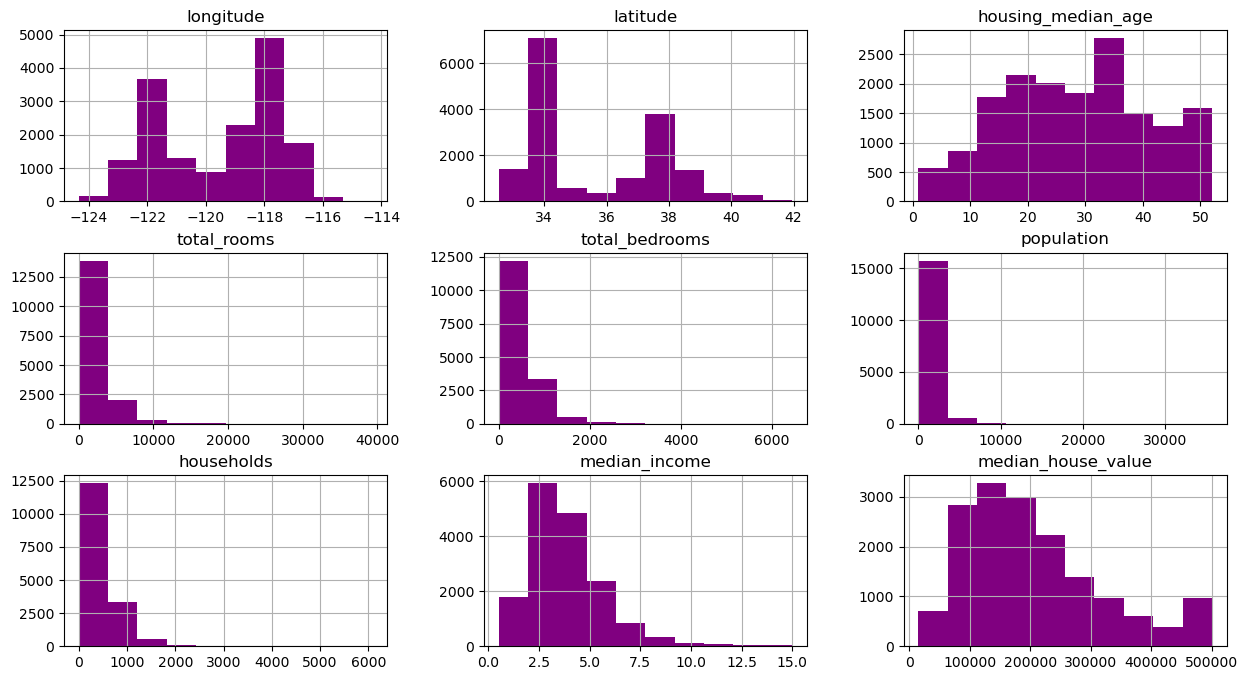

In [126]:
#Data Exploration
train_data.hist(figsize=(15,8),color="purple")

In [127]:
train_data
#train_data.info()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7537,-118.21,33.91,24.0,1545.0,391.0,1807.0,388.0,2.6429,<1H OCEAN,105300.0
18273,-122.08,37.36,28.0,2181.0,284.0,728.0,238.0,8.2266,NEAR BAY,500001.0
17753,-121.82,37.35,24.0,2298.0,575.0,2409.0,569.0,3.4509,<1H OCEAN,182400.0
16669,-120.70,35.32,46.0,118.0,17.0,6532.0,13.0,4.2639,NEAR OCEAN,350000.0
18254,-122.09,37.39,36.0,1035.0,196.0,475.0,205.0,5.5385,NEAR BAY,359000.0
...,...,...,...,...,...,...,...,...,...,...
12097,-117.28,33.89,33.0,6982.0,1371.0,5650.0,1195.0,2.5379,INLAND,152700.0
16343,-121.33,38.04,15.0,2903.0,440.0,1325.0,423.0,4.5179,INLAND,145600.0
20450,-118.91,34.28,6.0,6106.0,1134.0,3246.0,1062.0,5.2206,<1H OCEAN,280200.0
5032,-118.33,33.98,28.0,3889.0,1199.0,3121.0,1046.0,1.8806,<1H OCEAN,113900.0


In [128]:
#correlation between variables
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924973,-0.111125,0.051154,0.074938,0.106088,0.062529,-0.014856,-0.044462
latitude,-0.924973,1.000000,0.013022,-0.041932,-0.072525,-0.115733,-0.078467,-0.079453,-0.144859
housing_median_age,-0.111125,0.013022,1.000000,-0.364607,-0.322871,-0.296872,-0.305343,-0.118301,0.106520
total_rooms,0.051154,-0.041932,-0.364607,1.000000,0.931152,0.855090,0.918323,0.197012,0.132892
total_bedrooms,0.074938,-0.072525,-0.322871,0.931152,1.000000,0.875069,0.979365,-0.006118,0.053370
population,0.106088,-0.115733,-0.296872,0.855090,0.875069,1.000000,0.904946,0.007978,-0.021405
households,0.062529,-0.078467,-0.305343,0.918323,0.979365,0.904946,1.000000,0.015439,0.068852
median_income,-0.014856,-0.079453,-0.118301,0.197012,-0.006118,0.007978,0.015439,1.000000,0.683702
median_house_value,-0.044462,-0.144859,0.106520,0.132892,0.053370,-0.021405,0.068852,0.683702,1.000000


<Axes: >

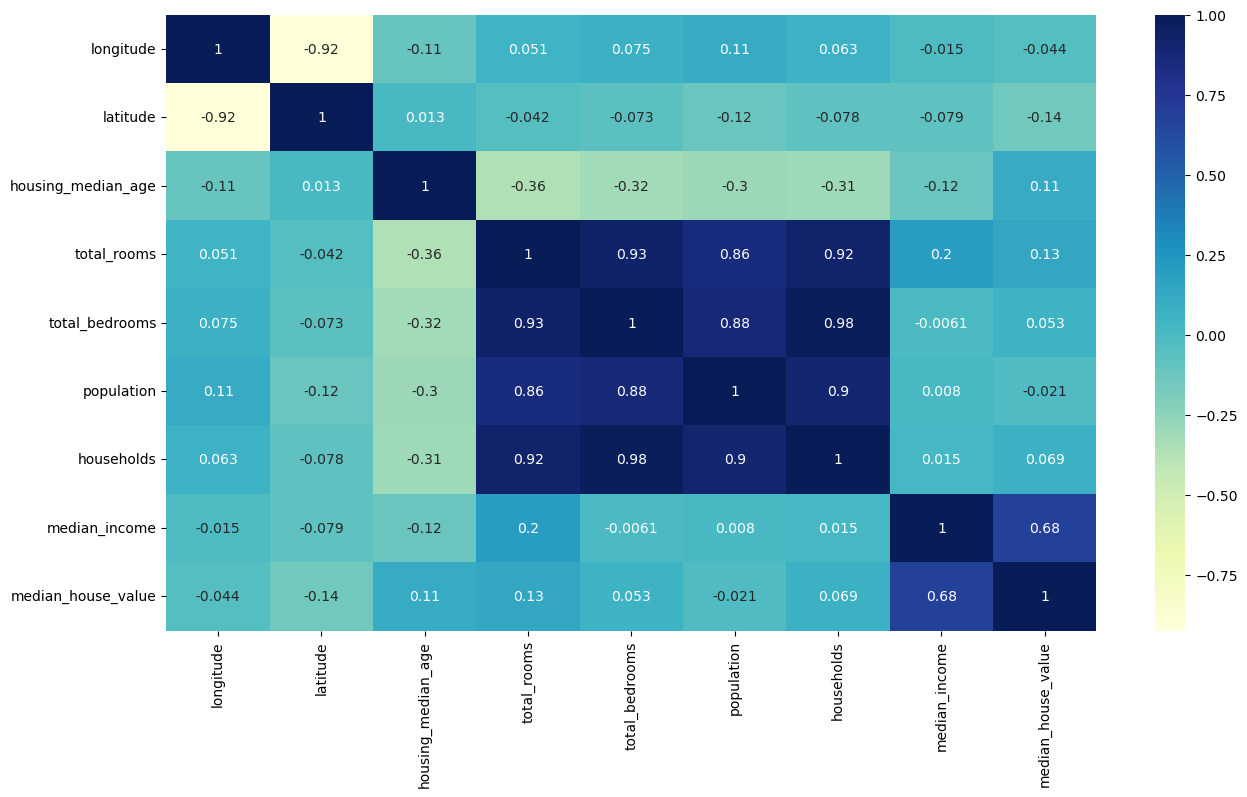

In [129]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [130]:
#Data Preprocessing
#applying a log transformation tonumerical features in the train_data DataFrame inorder to reduce the skewness 
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

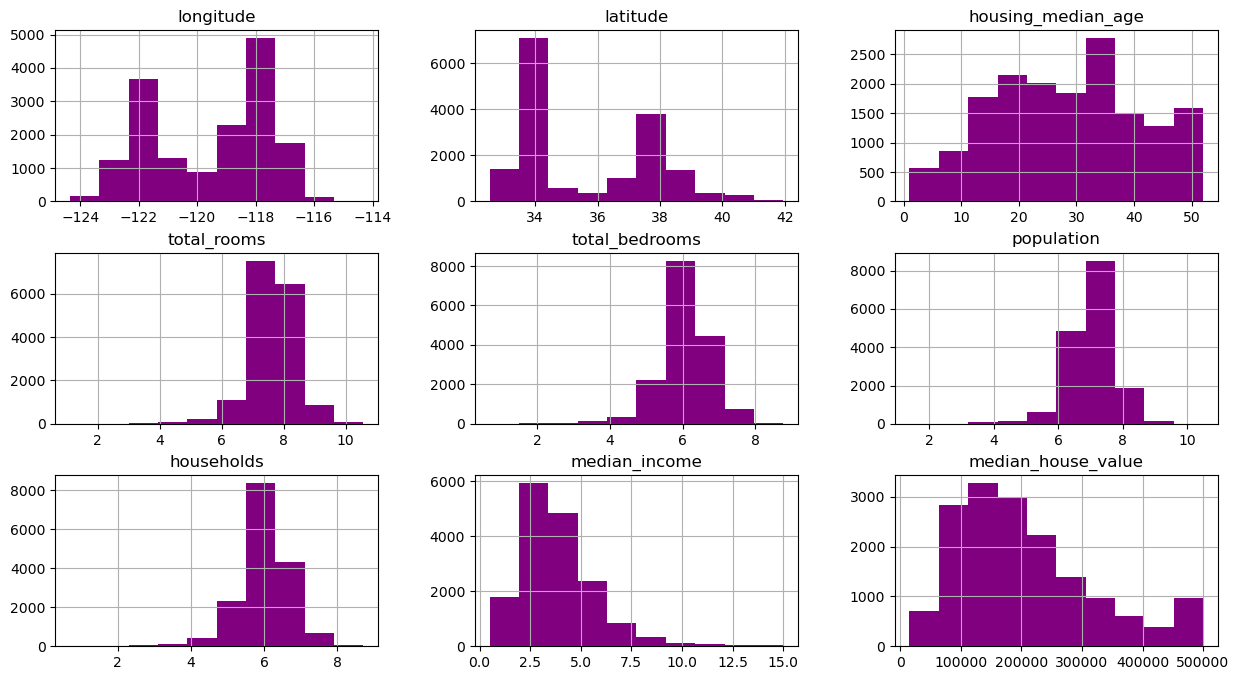

In [131]:
#graphs appear more symmetric
train_data.hist(figsize=(15,8),color="purple")

In [132]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7537,-118.21,33.91,24.0,7.343426,5.971262,7.499977,5.963579,2.6429,<1H OCEAN,105300.0
18273,-122.08,37.36,28.0,7.687997,5.652489,6.591674,5.476464,8.2266,NEAR BAY,500001.0
17753,-121.82,37.35,24.0,7.740230,6.356108,7.787382,6.345636,3.4509,<1H OCEAN,182400.0
16669,-120.70,35.32,46.0,4.779123,2.890372,8.784622,2.639057,4.2639,NEAR OCEAN,350000.0
18254,-122.09,37.39,36.0,6.943122,5.283204,6.165418,5.327876,5.5385,NEAR BAY,359000.0
...,...,...,...,...,...,...,...,...,...,...
12097,-117.28,33.89,33.0,8.851234,7.224025,8.639588,7.086738,2.5379,INLAND,152700.0
16343,-121.33,38.04,15.0,7.973844,6.089045,7.189922,6.049733,4.5179,INLAND,145600.0
20450,-118.91,34.28,6.0,8.717191,7.034388,8.085487,6.968850,5.2206,<1H OCEAN,280200.0
5032,-118.33,33.98,28.0,8.266164,7.090077,8.046229,6.953684,1.8806,<1H OCEAN,113900.0


In [133]:
#finidng the count of how many times each unique value appears in the ocean_proximity column
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7182
INLAND        5194
NEAR OCEAN    2114
NEAR BAY      1852
ISLAND           4
Name: count, dtype: int64

In [134]:
#transforming the ocean_proximity categorical variable into multiple binary columns using one-hot encoding
#then removes the original ocean_proximity column from the dataset,
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [135]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7537,-118.21,33.91,24.0,7.343426,5.971262,7.499977,5.963579,2.6429,105300.0,True,False,False,False,False
18273,-122.08,37.36,28.0,7.687997,5.652489,6.591674,5.476464,8.2266,500001.0,False,False,False,True,False
17753,-121.82,37.35,24.0,7.740230,6.356108,7.787382,6.345636,3.4509,182400.0,True,False,False,False,False
16669,-120.70,35.32,46.0,4.779123,2.890372,8.784622,2.639057,4.2639,350000.0,False,False,False,False,True
18254,-122.09,37.39,36.0,6.943122,5.283204,6.165418,5.327876,5.5385,359000.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12097,-117.28,33.89,33.0,8.851234,7.224025,8.639588,7.086738,2.5379,152700.0,False,True,False,False,False
16343,-121.33,38.04,15.0,7.973844,6.089045,7.189922,6.049733,4.5179,145600.0,False,True,False,False,False
20450,-118.91,34.28,6.0,8.717191,7.034388,8.085487,6.968850,5.2206,280200.0,True,False,False,False,False
5032,-118.33,33.98,28.0,8.266164,7.090077,8.046229,6.953684,1.8806,113900.0,True,False,False,False,False


<Axes: >

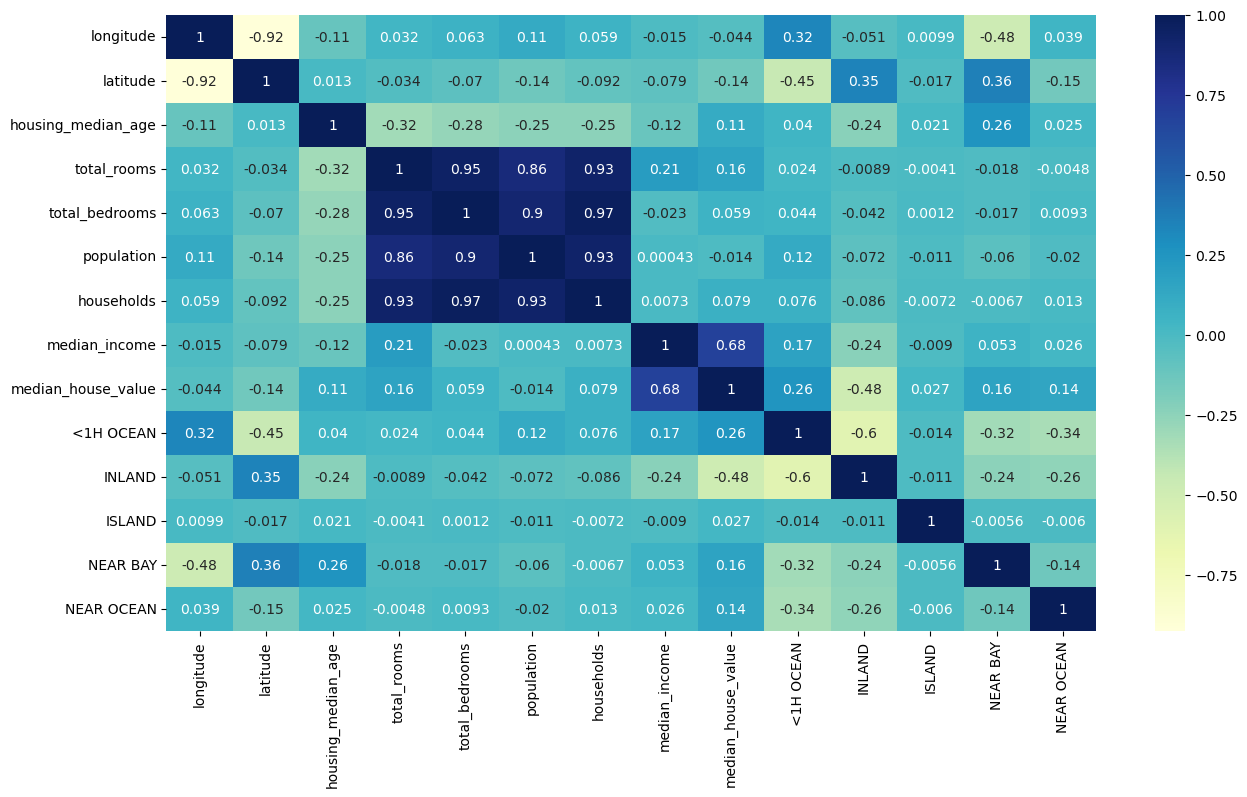

In [136]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

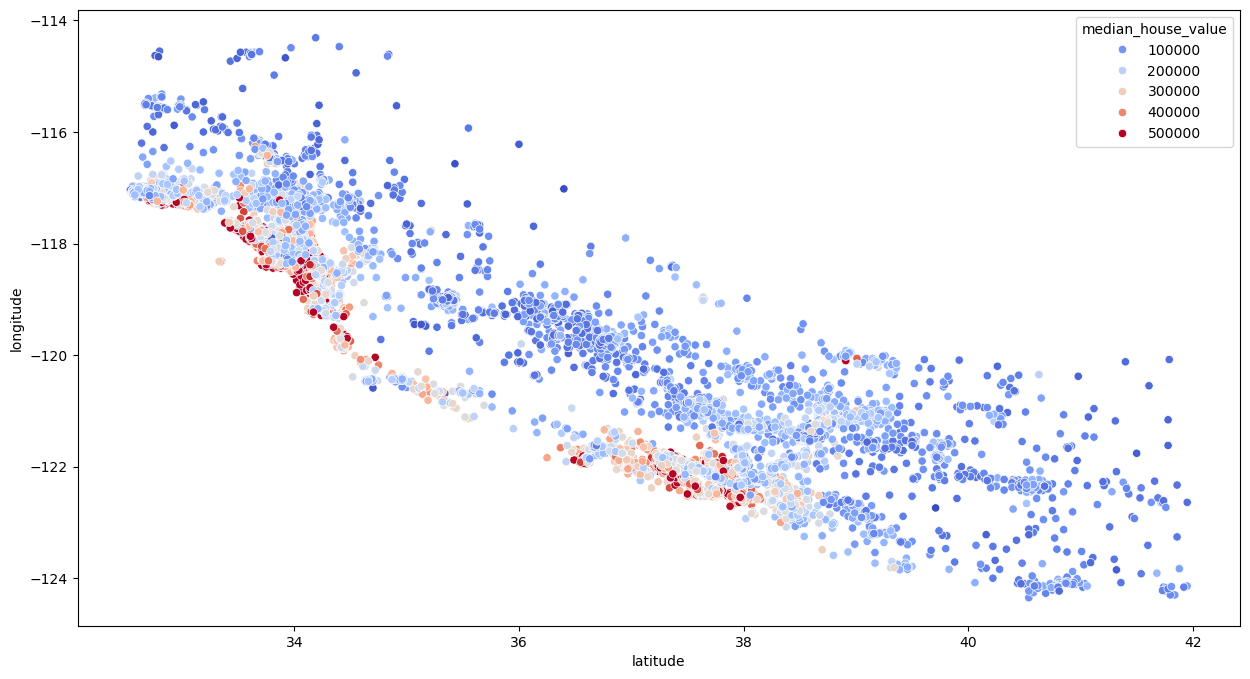

In [137]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data = train_data, hue="median_house_value",palette = "coolwarm")

In [138]:
#Feature Engineering
#creating two new features, bedroom_ratio and household_rooms, by calculating ratios 
#from existing columns (total_bedrooms, total_rooms, and households).
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

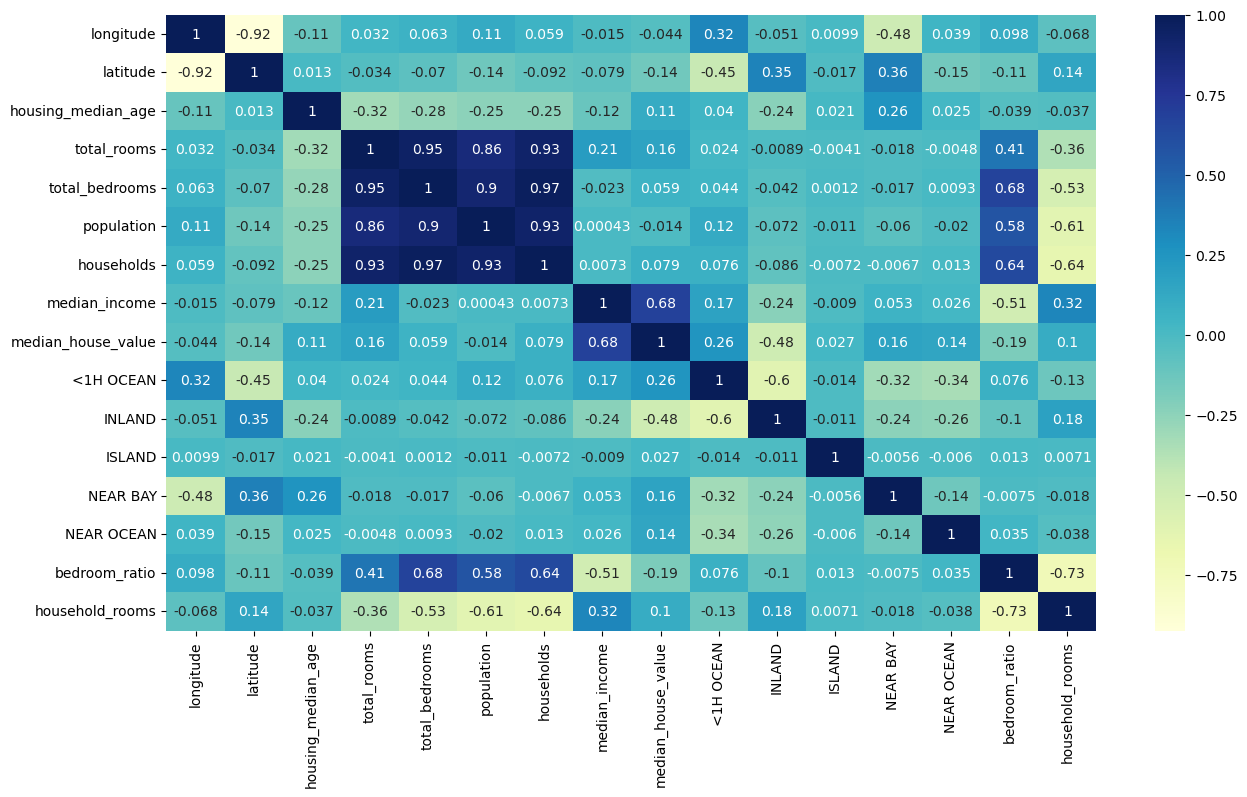

In [139]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [140]:
#data split into features (X_train) and target (Y_train), and standardized using StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, Y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

X_train_s = scaler.fit_transform(X_train)

#creating Linear regression model
reg = LinearRegression() 

reg.fit(X_train_s, Y_train)

LinearRegression()

In [141]:
#Combining features (X_test) and target (Y_test) are combined into a single DataFrame for consistency
test_data = X_test.join(Y_test)

#log-transforming numerical features in the test data to reduce skewness
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

#ocean_proximity converted into separate binary columns using one-hot encoding
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

#creating new features; bedroom_ratio and household_rooms
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [142]:
#X_test Contains the features (input variables) used to make predictions
#Y_test Contains actual target values (the values we want to predict)
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [143]:
#applying scaling that was performed on the training data to the test data
X_test_s = scaler.transform(X_test)

In [149]:
#evaluating the performance of the regression model
reg.score(X_test_s, Y_test)

0.6848768371584533

In [154]:
#Training a Random Forest Regressor on the training data (X_train_s, Y_train)
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)




RandomForestRegressor()

In [153]:
#evaluating performance
forest.score(X_test_s, Y_test)

0.8250213478928954

In [165]:
# Ensuring robust evaluation by using 5-fold cross-validation for each parameter combination.
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split":[2, 4],
    "max_depth":[None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [163]:
#finding the best model
grid_search.best_estimator_

In [164]:
#computing the R-squared (R²) value
grid_search.best_estimator_.score(X_test_s, Y_test)

0.8237253257052071